In [91]:
# Import pandas library
import pandas as pd

# Read the file into gross
gross_uk = pd.read_csv('./dataset/uk.csv',parse_dates=['Released'])

# Print out gross
gross_uk.head()

,Released,Title,Genre,Source,Domestic,International,Worldwide
0,2011-07-15,Harry Potter and the Deathly Hallows:,Adventure,Based on Fiction Book/Short Story,381193157,935085104,1316278261
1,2001-11-16,Harry Potter and the Sorcerer’s Stone,Adventure,Based on Fiction Book/Short Story,317871467,647172027,965043494
2,1964-12-22,Goldfinger,Action,Based on Fiction Book/Short Story,51100000,73800000,124900000
3,2009-07-15,Harry Potter and the Half-Blood Prince,Adventure,Based on Fiction Book/Short Story,302089278,627321791,929411069
4,2010-11-19,Harry Potter and the Deathly Hallows:,Adventure,Based on Fiction Book/Short Story,296131568,655636137,951767705


In [92]:
gross_us = pd.read_csv('./dataset/us.csv',parse_dates=['Released'])
gross_us.head()

,Released,Title,Genre,Source,Domestic,International,Worldwide
0,2015-12-18,Star Wars Ep. VII: The Force Awakens,Adventure,Original Screenplay,936662225,1127953592,2064615817
1,2019-04-26,Avengers: Endgame,Action,Based on Comic/Graphic Novel,858373000,1939359053,2797732053
2,2021-12-17,Spider-Man: No Way Home,Action,Based on Comic/Graphic Novel,814108407,1095933175,1910041582
3,2009-12-18,Avatar,Action,Original Screenplay,785221649,2125062453,2910284102
4,2022-05-27,Top Gun: Maverick,Action,Original Screenplay,716657763,770000000,1486657763


In [93]:
 # Extract year from release_date and store it in a new column
gross_uk['release_year'] = pd.DatetimeIndex(gross_uk['Released']).year

# Compute mean of adjusted gross per genre and per year
group_uk = gross_uk.groupby(['Genre','release_year']).mean()

# Convert the GroupBy object to a DataFrame
uk_genre_yearly = group_uk.reset_index()

# Inspect genre_yearly 
uk_genre_yearly.head()

,Genre,release_year,Domestic,International,Worldwide
0,Action,1964,51100000.0,73800000.0,124900000.0
1,Action,1965,63600000.0,77600000.0,141200000.0
2,Action,1977,50800000.0,0.0,50800000.0
3,Action,1979,70300000.0,140000000.0,210300000.0
4,Action,1981,54800000.0,140500000.0,195300000.0


In [94]:
 # Extract year from release_date and store it in a new column
gross_us['release_year'] = pd.DatetimeIndex(gross_us['Released']).year

# Compute mean of adjusted gross per genre and per year
group_us = gross_us.groupby(['Genre','release_year']).mean()

# Convert the GroupBy object to a DataFrame
us_genre_yearly = group_us.reset_index()

# Inspect genre_yearly 
us_genre_yearly.head()

,Genre,release_year,Domestic,International,Worldwide
0,Action,2007,319246193.0,3.890264e+08,7.082726e+08
1,Action,2008,533720947.0,4.648948e+08,9.986158e+08
2,Action,2009,593666759.5,1.279735e+09,1.873402e+09
3,Action,2010,312433331.0,3.087231e+08,6.211564e+08
4,Action,2011,352390543.0,7.714035e+08,1.123794e+09


<AxesSubplot:xlabel='release_year', ylabel='Worldwide'>

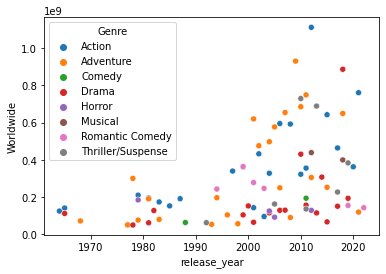

In [10]:
# Import seaborn library
import seaborn as sns
import matplotlib.pyplot as plt

# Plot the data  
sns.scatterplot(x='release_year', y='Worldwide', hue='Genre',data=uk_genre_yearly)

<AxesSubplot:xlabel='release_year', ylabel='Worldwide'>

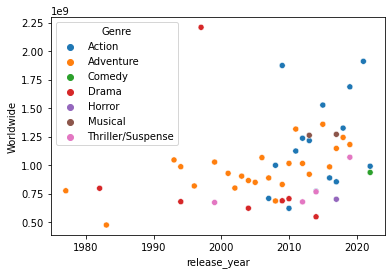

In [11]:
sns.scatterplot(x='release_year', y='Worldwide', hue='Genre',data=us_genre_yearly)

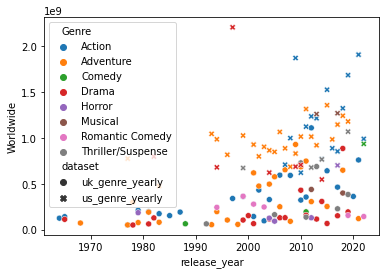

In [15]:
concatenated = pd.concat([uk_genre_yearly.assign(dataset='uk_genre_yearly'), us_genre_yearly.assign(dataset='us_genre_yearly')])
sns.scatterplot(x='release_year', y='Worldwide', data=concatenated, hue='Genre', style='dataset')
plt.show()

In [21]:
gross_uk['Genre'].value_counts()

Adventure            32
Action               27
Drama                19
Thriller/Suspense     8
Romantic Comedy       6
Horror                4
Comedy                2
Musical               2
Name: Genre, dtype: int64

In [22]:
gross_us['Genre'].value_counts()

Adventure            49
Action               36
Drama                 7
Thriller/Suspense     4
Musical               2
Comedy                1
Horror                1
Name: Genre, dtype: int64

In [17]:
# Convert genre variable to dummy variables 
uk_genre_dummies = pd.get_dummies(data = gross_uk['Genre'])

# Inspect genre_dummies
uk_genre_dummies.head()

,Action,Adventure,Comedy,Drama,Horror,Musical,Romantic Comedy,Thriller/Suspense
0,0,1,0,0,0,0,0,0
1,0,1,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0
3,0,1,0,0,0,0,0,0
4,0,1,0,0,0,0,0,0


In [18]:
# Convert genre variable to dummy variables 
us_genre_dummies = pd.get_dummies(data = gross_us['Genre'])

# Inspect genre_dummies
us_genre_dummies.head()

,Action,Adventure,Comedy,Drama,Horror,Musical,Thriller/Suspense
0,0,1,0,0,0,0,0
1,1,0,0,0,0,0,0
2,1,0,0,0,0,0,0
3,1,0,0,0,0,0,0
4,1,0,0,0,0,0,0


In [30]:
# Import LinearRegression
from sklearn.linear_model import LinearRegression

# Build a linear regression model
regr_uk = LinearRegression()

# Fit regr to the dataset
regr_uk.fit(uk_genre_dummies, gross_uk['Worldwide'])

# Get estimated intercept and coefficient values 
action_uk =  regr_uk.intercept_
adventure_uk = regr_uk.coef_[[0]][0]

# Inspect the estimated intercept and coefficient values 
print((action_uk, adventure_uk))

(276786072.6428789, 84276447.28304712)


In [32]:
# Build a linear regression model
regr_us = LinearRegression()

# Fit regr to the dataset
regr_us.fit(us_genre_dummies, gross_us['Worldwide'])

# Get estimated intercept and coefficient values 
action_us =  regr.intercept_
adventure_us = regr.coef_[[0]][0]

# Inspect the estimated intercept and coefficient values 
print((action_us, adventure_us))

(967307985.5155492, 226724442.56778416)


In [42]:
# Import a module
import numpy as np

# Create an array of indices to sample from 
inds = np.arange(len(gross_uk['Genre']))

# Initialize 500 replicate arrays
size = 500
bs_action_reps_uk =  np.empty(size)
bs_adventure_reps_uk =  np.empty(size)

# Create an array of indices to sample from 
inds = np.arange(len(gross_us['Genre']))

bs_action_reps_us =  np.empty(size)
bs_adventure_reps_us =  np.empty(size)


In [45]:
for i in range(size):
    
    # Resample the indices 
    bs_inds = np.random.choice(inds,size=len(inds))
    
    # Get the sampled genre and sampled adjusted gross
    bs_genre_uk = gross_uk['Genre'][bs_inds] 
    bs_gross_uk = gross_uk['Worldwide'][bs_inds]
    
    # Convert sampled genre to dummy variables
    bs_dummies_uk = pd.get_dummies(bs_genre_uk, drop_first = True)
   
    # Build and fit a regression model 
    regr_uk = LinearRegression().fit(bs_dummies_uk, bs_gross_uk)
    
    # Compute replicates of estimated intercept and coefficient
    bs_action_reps_uk[i] = regr_uk.intercept_
    bs_adventure_reps_uk[i] = regr_uk.coef_[[0]][0]

In [46]:
# Compute 95% confidence intervals for intercept and coefficient values
confidence_interval_action_uk = np.percentile(bs_action_reps_uk, [2.5, 97.5])
confidence_interval_adventure_uk = np.percentile(bs_adventure_reps_uk, [2.5, 97.5])

# Inspect the confidence intervals
print(confidence_interval_action_uk)
print(confidence_interval_adventure_uk)

[2.56418177e+08 4.52847174e+08]
[-1.10451852e+08  1.99891454e+08]


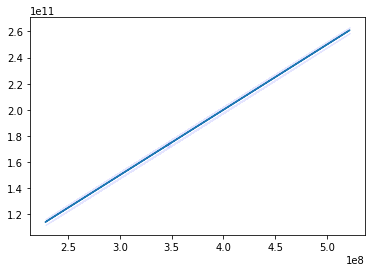

In [51]:
x = bs_action_reps_uk
y = size * x
#some confidence interval
ci = 1.96 * np.std(y)/np.sqrt(len(x))

fig, ax = plt.subplots()
ax.plot(x,y)
ax.fill_between(x, (y-ci), (y+ci), color='b', alpha=.1)

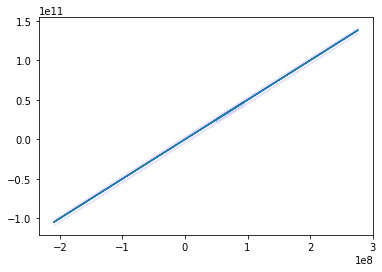

In [52]:
x = bs_adventure_reps_uk
y = size * x
#some confidence interval
ci = 1.96 * np.std(y)/np.sqrt(len(x))

fig, ax = plt.subplots()
ax.plot(x,y)
ax.fill_between(x, (y-ci), (y+ci), color='b', alpha=.1)

In [49]:
for i in range(size):
    
    # Resample the indices 
    bs_inds = np.random.choice(inds,size=len(inds))
    
    # Get the sampled genre and sampled adjusted gross
    bs_genre_us = gross_us['Genre'][bs_inds] 
    bs_gross_us = gross_us['Worldwide'][bs_inds]
    
    # Convert sampled genre to dummy variables
    bs_dummies_us = pd.get_dummies(bs_genre_us, drop_first = True)
   
    # Build and fit a regression model 
    regr_us = LinearRegression().fit(bs_dummies_us, bs_gross_us)
    
    # Compute replicates of estimated intercept and coefficient
    bs_action_reps_us[i] = regr_us.intercept_
    bs_adventure_reps_us[i] = regr_us.coef_[[0]][0]

In [50]:
# Compute 95% confidence intervals for intercept and coefficient values
confidence_interval_action_us = np.percentile(bs_action_reps_us, [2.5, 97.5])
confidence_interval_adventure_us = np.percentile(bs_adventure_reps_us, [2.5, 97.5])

# Inspect the confidence intervals
print(confidence_interval_action_us)
print(confidence_interval_adventure_us)

[1.03302002e+09 1.36477978e+09]
[-3.90612258e+08 -2.47851023e+07]


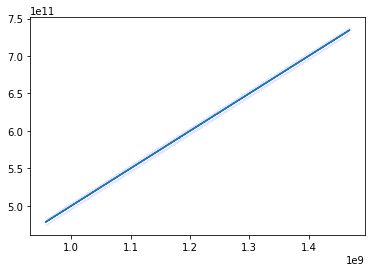

In [53]:
x = bs_action_reps_us
y = size * x
#some confidence interval
ci = 1.96 * np.std(y)/np.sqrt(len(x))

fig, ax = plt.subplots()
ax.plot(x,y)
ax.fill_between(x, (y-ci), (y+ci), color='b', alpha=.1)

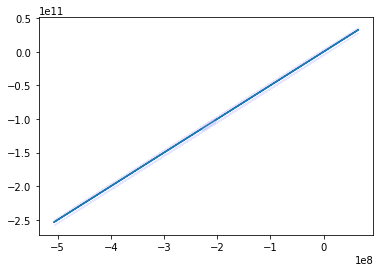

In [54]:
x = bs_adventure_reps_us
y = size * x
#some confidence interval
ci = 1.96 * np.std(y)/np.sqrt(len(x))

fig, ax = plt.subplots()
ax.plot(x,y)
ax.fill_between(x, (y-ci), (y+ci), color='b', alpha=.1)

In [55]:
# Compute mean of adjusted gross per genre and per year
group_uk = gross_uk.groupby(['Source','release_year']).mean()

# Convert the GroupBy object to a DataFrame
uk_source_yearly = group_uk.reset_index()

# Inspect genre_yearly 
uk_source_yearly.head(10)

,Source,release_year,Domestic,International,Worldwide
0,Based on Comic/Graphic Novel,1978,134218018.0,165981982.0,300200000.0
1,Based on Comic/Graphic Novel,1981,108185706.0,82214294.0,190400000.0
2,Based on Comic/Graphic Novel,1983,59950623.0,20249377.0,80200000.0
3,Based on Comic/Graphic Novel,2011,146408305.0,209000000.0,355408305.0
4,Based on Comic/Graphic Novel,2015,128261724.0,276300000.0,404561724.0
5,Based on Comic/Graphic Novel,2017,100234838.0,308568858.0,408803696.0
6,Based on Fiction Book/Short Story,1964,51100000.0,73800000.0,124900000.0
7,Based on Fiction Book/Short Story,1965,87748915.0,38871279.0,126620194.0
8,Based on Fiction Book/Short Story,1977,50740942.0,0.0,50740942.0
9,Based on Fiction Book/Short Story,1979,70300000.0,140000000.0,210300000.0


In [56]:
# Compute mean of adjusted gross per genre and per year
group_us = gross_us.groupby(['Source','release_year']).mean()

# Convert the GroupBy object to a DataFrame
us_source_yearly = group_us.reset_index()

# Inspect genre_yearly 
us_source_yearly.head(10)

,Source,release_year,Domestic,International,Worldwide
0,Based on Comic/Graphic Novel,2002,403706375.0,418000000.0,8.217064e+08
1,Based on Comic/Graphic Novel,2004,373524485.0,421173072.0,7.946976e+08
2,Based on Comic/Graphic Novel,2007,336530303.0,558329927.0,8.948602e+08
3,Based on Comic/Graphic Novel,2008,426162536.5,365731131.5,7.918937e+08
4,Based on Comic/Graphic Novel,2010,312433331.0,308723058.0,6.211564e+08
5,Based on Comic/Graphic Novel,2012,535748504.5,762915654.5,1.298664e+09
6,Based on Comic/Graphic Novel,2013,408992272.0,806400000.0,1.215392e+09
7,Based on Comic/Graphic Novel,2014,333714112.0,437168283.0,7.708824e+08
8,Based on Comic/Graphic Novel,2015,459005868.0,936311111.0,1.395317e+09
9,Based on Comic/Graphic Novel,2016,356653826.5,531343010.5,8.879968e+08


<AxesSubplot:xlabel='release_year', ylabel='Worldwide'>

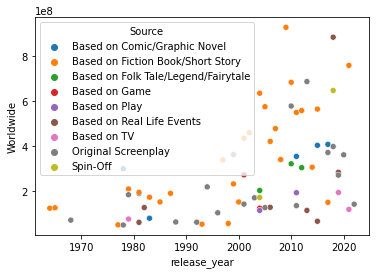

In [62]:
sns.scatterplot(x='release_year', y='Worldwide', hue='Source',data=uk_source_yearly)

<AxesSubplot:xlabel='release_year', ylabel='Worldwide'>

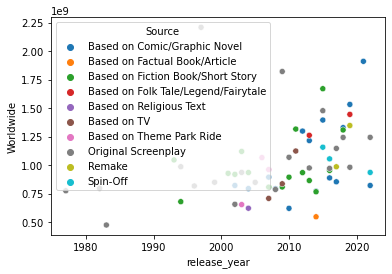

In [63]:
sns.scatterplot(x='release_year', y='Worldwide', hue='Source',data=us_source_yearly)

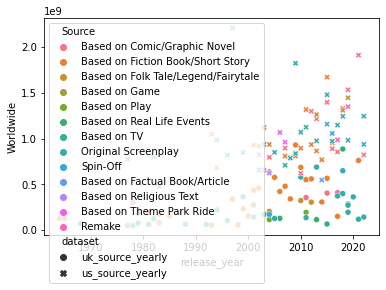

In [64]:
concatenated = pd.concat([uk_source_yearly.assign(dataset='uk_source_yearly'), us_source_yearly.assign(dataset='us_source_yearly')])
sns.scatterplot(x='release_year', y='Worldwide', data=concatenated, hue='Source', style='dataset')
plt.show()

In [65]:
print(gross_uk['Source'].value_counts())
print(gross_us['Source'].value_counts())

Based on Fiction Book/Short Story      49
Original Screenplay                    25
Based on Real Life Events               8
Based on Comic/Graphic Novel            6
Based on Folk Tale/Legend/Fairytale     3
Based on TV                             3
Spin-Off                                2
Based on Play                           2
Based on Game                           2
Name: Source, dtype: int64
Based on Comic/Graphic Novel           31
Original Screenplay                    30
Based on Fiction Book/Short Story      22
Remake                                  4
Spin-Off                                3
Based on TV                             3
Based on Theme Park Ride                3
Based on Folk Tale/Legend/Fairytale     2
Based on Factual Book/Article           1
Based on Religious Text                 1
Name: Source, dtype: int64


In [67]:
# Convert genre variable to dummy variables 
uk_source_dummies = pd.get_dummies(data = gross_uk['Source'])
us_source_dummies = pd.get_dummies(data = gross_us['Source'])

In [68]:
# Import LinearRegression
from sklearn.linear_model import LinearRegression

# Build a linear regression model
regr_uk = LinearRegression()

# Fit regr to the dataset
regr_uk.fit(uk_source_dummies, gross_uk['Worldwide'])

# Get estimated intercept and coefficient values 
Fiction_Book_uk =  regr_uk.intercept_
Screenplay_uk = regr_uk.coef_[[0]][0]

# Inspect the estimated intercept and coefficient values 
print((Fiction_Book_uk, Screenplay_uk))

(261073069.9199358, 28855884.246730935)


In [69]:
# Build a linear regression model
regr_us = LinearRegression()

# Fit regr to the dataset
regr_us.fit(us_genre_dummies, gross_us['Worldwide'])

# Get estimated intercept and coefficient values 
Comic_us =  regr.intercept_
Screenplay_us = regr.coef_[[0]][0]

# Inspect the estimated intercept and coefficient values 
print((Comic_us, Screenplay_us))

(967307985.5155492, 226724442.56778416)


In [70]:
# Create an array of indices to sample from 
inds = np.arange(len(gross_uk['Source']))

# Initialize 500 replicate arrays
size = 500
bs_fiction_reps_uk =  np.empty(size)
bs_screenplay_reps_uk =  np.empty(size)

# Create an array of indices to sample from 
inds = np.arange(len(gross_us['Source']))

bs_comic_reps_us =  np.empty(size)
bs_screenplay_reps_us =  np.empty(size)


In [72]:
for i in range(size):
    
    # Resample the indices 
    bs_inds = np.random.choice(inds,size=len(inds))
    
    # Get the sampled genre and sampled adjusted gross
    bs_source_uk = gross_uk['Source'][bs_inds] 
    bs_gross_uk = gross_uk['Worldwide'][bs_inds]
    
    # Convert sampled genre to dummy variables
    bs_dummies_uk = pd.get_dummies(bs_genre_uk, drop_first = True)
   
    # Build and fit a regression model 
    regr_uk = LinearRegression().fit(bs_dummies_uk, bs_gross_uk)
    
    # Compute replicates of estimated intercept and coefficient
    bs_fiction_reps_uk[i] = regr_uk.intercept_
    bs_screenplay_reps_uk[i] = regr_uk.coef_[[0]][0]

In [79]:
# Compute 95% confidence intervals for intercept and coefficient values
confidence_interval_fiction_uk = np.percentile(bs_fiction_reps_uk, [2.5, 97.5])
confidence_interval_screenplay_uk = np.percentile(bs_screenplay_reps_uk, [2.5, 97.5])

# Inspect the confidence intervals
print(confidence_interval_fiction_uk)
print(confidence_interval_screenplay_uk)

[2.36773870e+08 4.15751461e+08]
[-1.38273960e+08  1.47941643e+08]


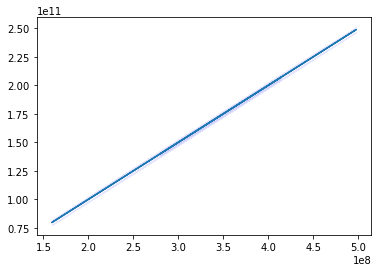

In [80]:
x = bs_fiction_reps_uk
y = size * x
#some confidence interval
ci = 1.96 * np.std(y)/np.sqrt(len(x))

fig, ax = plt.subplots()
ax.plot(x,y)
ax.fill_between(x, (y-ci), (y+ci), color='b', alpha=.1)

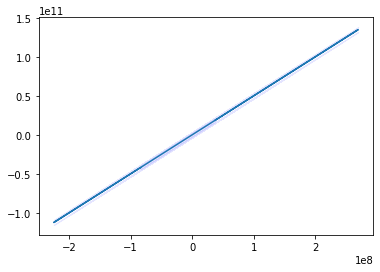

In [81]:
x = bs_screenplay_reps_uk
y = size * x
#some confidence interval
ci = 1.96 * np.std(y)/np.sqrt(len(x))

fig, ax = plt.subplots()
ax.plot(x,y)
ax.fill_between(x, (y-ci), (y+ci), color='b', alpha=.1)

In [84]:
for i in range(size):
    
    # Resample the indices 
    bs_inds = np.random.choice(inds,size=len(inds))
    
    # Get the sampled genre and sampled adjusted gross
    bs_source_us = gross_us['Source'][bs_inds] 
    bs_gross_us = gross_us['Worldwide'][bs_inds]
    
    # Convert sampled genre to dummy variables
    bs_dummies_us = pd.get_dummies(bs_source_us, drop_first = True)
   
    # Build and fit a regression model 
    regr_us = LinearRegression().fit(bs_dummies_us, bs_gross_us)
    
    # Compute replicates of estimated intercept and coefficient
    bs_comic_reps_us[i] = regr_us.intercept_
    bs_screenplay_reps_us[i] = regr_us.coef_[[0]][0]

In [85]:
# Compute 95% confidence intervals for intercept and coefficient values
confidence_interval_comic_us = np.percentile(bs_comic_reps_us, [2.5, 97.5])
confidence_interval_screenplay_us = np.percentile(bs_screenplay_reps_us, [2.5, 97.5])

# Inspect the confidence intervals
print(confidence_interval_comic_us)
print(confidence_interval_screenplay_us)

[9.41478021e+08 1.26578158e+09]
[-6.87149543e+08  2.44730258e+07]


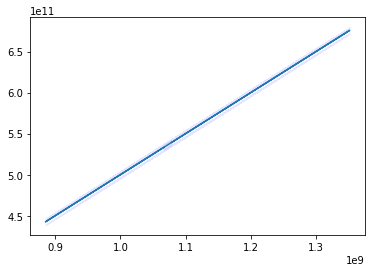

In [88]:
x = bs_comic_reps_us
y = size * x
#some confidence interval
ci = 1.96 * np.std(y)/np.sqrt(len(x))

fig, ax = plt.subplots()
ax.plot(x,y)
ax.fill_between(x, (y-ci), (y+ci), color='b', alpha=.1)

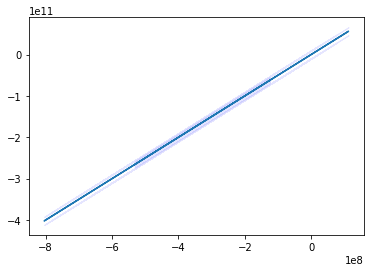

In [90]:
x = bs_screenplay_reps_us
y = size * x
#some confidence interval
ci = 1.96 * np.std(y)/np.sqrt(len(x))

fig, ax = plt.subplots()
ax.plot(x,y)
ax.fill_between(x, (y-ci), (y+ci), color='b', alpha=.1)